## Learning objectives for the week
**Building stronger foundation in Pandas**
1. Data cleaning, formating etc.
2. What are some good questions to ask looking at a dataset?
3. Exploratory Data Analysis, summary stats and visual
4. Time series analyses




#### Today's project using Movies dataset : Background
How have been movies performing over years? Can we say higher the budget, more likely a movie is to profit? Which genres are doing well etc.? 

In [2]:
# Importing the required packages here

import numpy as np
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

### Let's load the data

In [3]:
# Let's load the dataset and create their dataframes
movies_df = pd.read_csv('tmdb_5000_movies.csv')
#pd.get_option('column_width') # find the right option to display everything
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### 1. Understand the data, its shape etc.

In [4]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [5]:
movies_df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [6]:
movies_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [7]:
movies_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [8]:
movies_df.status.value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [9]:
movies_df.original_language.value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
id       2
ar       2
ta       2
ro       2
cs       2
no       1
vi       1
is       1
tr       1
pl       1
te       1
nb       1
xx       1
af       1
hu       1
sl       1
ps       1
ky       1
el       1
Name: original_language, dtype: int64

## 2. Data cleaning 
1. Remove unnecessary columns
2. Remove duplicate records (if any)
3. Remove movies with 0 budget or 0 revenue. Also check other columns where the 0 value doesnt make sense and replace those by NA
4. Keep only the Released movies
5. Change column formats

#### 1. Removing Columns

In [10]:
## identified columns to drop: Seel can also drop status after limiting data for Released only
drop_cols=['keywords', 'homepage', 'tagline', 'overview', 'production_companies', 'original_title','spoken_languages']
movies_df.drop(drop_cols,axis=1,inplace=True)
movies_df.head()

,budget,genres,id,original_language,popularity,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,Released,John Carter,6.1,2124


#### 2. Remove the duplicate records

In [11]:
print(movies_df.shape)
movies_df = movies_df.drop_duplicates(keep='first')
print(movies_df.shape)

(4803, 13)
(4803, 13)


#### 3. drop records where budget or revenue is 0

In [12]:
movies_df.drop(movies_df[(movies_df.budget==0)|(movies_df.revenue==0)].index, inplace=True)
print(movies_df.shape)

cols_0_to_na=['runtime','budget','revenue','vote_average']
movies_df[cols_0_to_na] = movies_df[cols_0_to_na].replace(0, np.nan)


(3229, 13)


In [13]:
movies_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,3.229000e+03,3229.000000,3229.000000,3.229000e+03,3229.000000,3227.000000,3229.000000
mean,4.065444e+07,44780.705791,29.033689,1.212430e+08,110.724373,6.313263,977.287395
std,4.439674e+07,74609.434723,36.165730,1.863029e+08,20.965694,0.859921,1414.309577
min,1.000000e+00,5.000000,0.019984,5.000000e+00,41.000000,2.300000,0.000000
25%,1.050000e+07,4958.000000,10.446722,1.700000e+07,96.000000,5.800000,178.000000
50%,2.500000e+07,11451.000000,20.410354,5.518472e+07,107.000000,6.300000,471.000000
75%,5.500000e+07,45272.000000,37.335721,1.462920e+08,121.000000,6.900000,1148.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


#### 4. Keep only the Released movies (and drop status column after)

In [14]:
movies_df=movies_df[movies_df.status=='Released']
movies_df.drop('status',axis=1,inplace=True)
print(movies_df.shape)


(3228, 12)


#### 5. Change data types where applicable

In [15]:
movies_df.dtypes

budget                    int64
genres                   object
id                        int64
original_language        object
popularity              float64
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [16]:
movies_df.release_date=pd.to_datetime(movies_df.release_date)
movies_df['release_year']=movies_df.release_date.dt.year
movies_df.dtypes

budget                           int64
genres                          object
id                               int64
original_language               object
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
title                           object
vote_average                   float64
vote_count                       int64
release_year                     int64
dtype: object

#### Additional: How to handle the Json in Dataset?

In [17]:
# we see that there are columns which are in json format,
# take the first entry in the json to represent the column
# We can also flatten these json data into easyily interpretable lists - see commented

def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        first_entry='NA'
        if(len(i)>0):
            first_entry=i[0][key]
        movies_df.loc[index,'parsed_'+column]=first_entry
#         list1=[]
#         for j in range(len(i)):
#             list1.append((i[j][key]))# the key 'name' contains the name of the genre
#         movies_df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')

movies_df.head()


,budget,genres,id,original_language,popularity,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,release_year,parsed_genres,parsed_production_countries
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800,2009,Action,United States of America
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007,Adventure,United States of America
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Spectre,6.3,4466,2015,Action,United Kingdom
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,2012,Action,United States of America
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,John Carter,6.1,2124,2012,Action,United States of America


## 3. EDA: Looking at this dataset, we need to define a set of questions.

**Some ideas below: **

**Understand the distributions of different columns:**
1. What is the distribution of budget for the movies? Which are 5 most expensive movies?
    Do the same for revenue, runtime, vote count, popularity & vote average
    Also create a profit column & analyze its distribution the same way
2. What are the most popular genres. Make a bar plot with genres.
    Do the same for other categorical variables i.e. language & production country
3. How many movies are there in this data by different years.

**Bivariates**
4. Correlation b/w numeric columns like budget & revenue/ profits, popularity & vote average
5. Profits by genre, country of production

**Trends**
6. By every 50 years analyze profits, budgets, revenue, runtimes, etc.
7. Zoom into last 5 years and analyze the same by weeks.
8. Bonus: Analyze the counts by genres over time

**Do summarize your findings**

## Let's answer Question #1

In [18]:
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
# What is the distribution of budget for the movies? Which are 5 most expensive movies? Do the same for revenue, runtime, vote count, popularity & vote average Also create a profit column & analyze its distribution the same way

In [19]:
movies_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,profit
count,3.228000e+03,3228.000000,3228.000000,3.228000e+03,3228.000000,3226.000000,3228.000000,3228.000000,3.228000e+03
mean,4.066642e+07,44778.817844,29.042156,1.212803e+08,110.724907,6.313577,977.585812,2001.677509,8.061384e+07
std,4.439840e+07,74620.916870,36.168131,1.863197e+08,20.968920,0.859869,1414.427021,13.280569,1.581659e+08
min,1.000000e+00,5.000000,0.019984,5.000000e+00,41.000000,2.300000,0.000000,1916.000000,-1.657101e+08
25%,1.050000e+07,4956.250000,10.468206,1.700000e+07,96.000000,5.800000,178.000000,1998.000000,2.355852e+05
50%,2.500000e+07,11446.500000,20.412963,5.519150e+07,107.000000,6.300000,471.000000,2005.000000,2.617376e+07
75%,5.500000e+07,45269.750000,37.340747,1.463434e+08,121.000000,6.900000,1148.000000,2010.000000,9.749217e+07
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000,2016.000000,2.550965e+09


In [20]:
def univariate_dist (var='budget'):
    top5=pd.DataFrame
    fig,ax=plt.subplots(figsize=(15,5),ncols=2,nrows=1)
    movies_df[var].hist(bins=50, ax=ax[0])
    ax[0].set_title(var+': Histogram')
    movies_df[var].plot(kind='box', ax=ax[1])
    ax[1].set_title(var+':Boxplot')
    
    top5=movies_df.sort_values(by =var, ascending=False).iloc[:5,:]
    return (fig,top5)


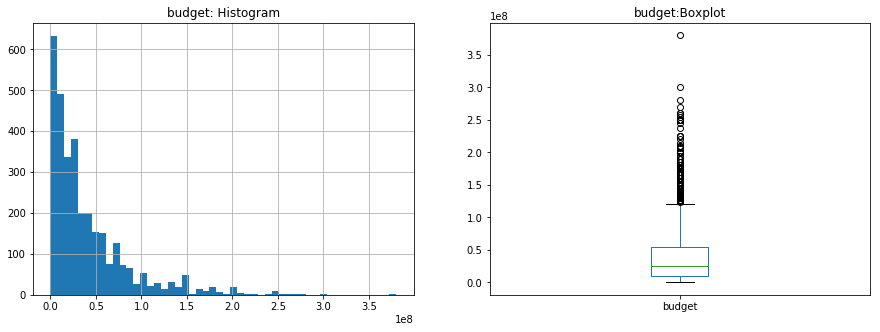

In [21]:
fig,top5=univariate_dist('budget')

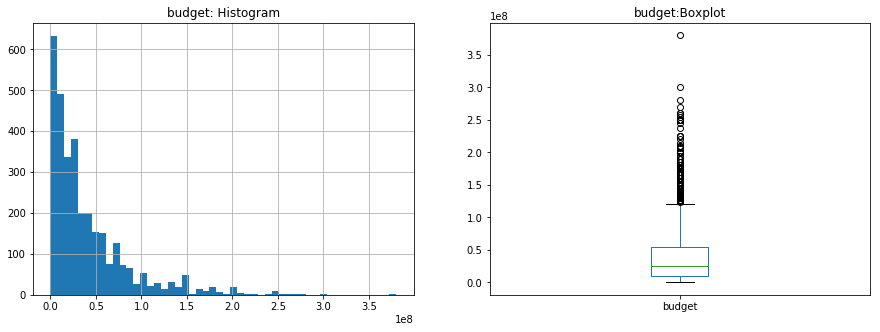

In [22]:
fig,top5=univariate_dist('budget')

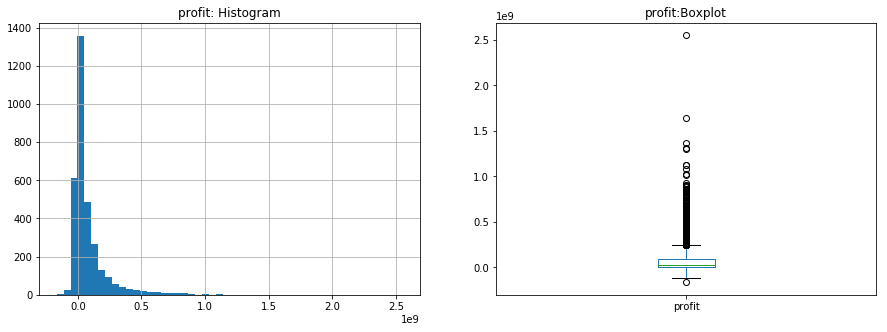

In [23]:
fig,top5=univariate_dist('profit')

In [24]:
top5

,budget,genres,id,original_language,popularity,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,release_year,parsed_genres,parsed_production_countries,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800,2009,Action,United States of America,2550965087
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",597,en,100.025899,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-11-18,1845034188,194.0,Titanic,7.5,7562,1997,Drama,United States of America,1645034188
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",135397,en,418.708552,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-09,1513528810,124.0,Jurassic World,6.5,8662,2015,Action,United States of America,1363528810
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",168259,en,102.322217,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",2015-04-01,1506249360,137.0,Furious 7,7.3,4176,2015,Action,Japan,1316249360
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",24428,en,144.448633,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-25,1519557910,143.0,The Avengers,7.4,11776,2012,Science Fiction,United States of America,1299557910


### Finding 1: The top 5 movies in terms on budget dont necessarily overlap with the top 5 by profit. Hence lets look at the correlation between two

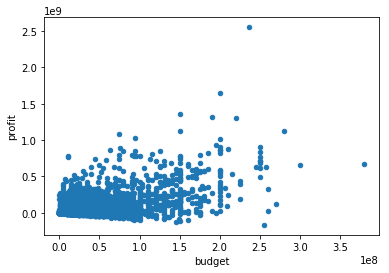

In [25]:
movies_df.plot(kind='scatter',x='budget',y='profit')

In [26]:
movies_df.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,profit
budget,1.000000,0.013648,0.431875,0.705353,0.229495,-0.036087,0.540084,0.267424,0.550200
id,0.013648,1.000000,0.177889,0.030131,-0.033428,-0.050796,0.106905,0.419504,0.031663
popularity,0.431875,0.177889,1.000000,0.602186,0.182195,0.288001,0.749048,0.161542,0.588146
revenue,0.705353,0.030131,0.602186,1.000000,0.233073,0.187830,0.756177,0.147604,0.980003
runtime,0.229495,-0.033428,0.182195,0.233073,1.000000,0.386253,0.257924,-0.157592,0.210139
vote_average,-0.036087,-0.050796,0.288001,0.187830,0.386253,1.000000,0.380685,-0.192372,0.231382
vote_count,0.540084,0.106905,0.749048,0.756177,0.257924,0.380685,1.000000,0.173539,0.739172
release_year,0.267424,0.419504,0.161542,0.147604,-0.157592,-0.192372,0.173539,1.000000,0.098810
profit,0.550200,0.031663,0.588146,0.980003,0.210139,0.231382,0.739172,0.098810,1.000000


### Finding 2: Profitability is correlated to vote_count

## Categorical columns

#### Genre

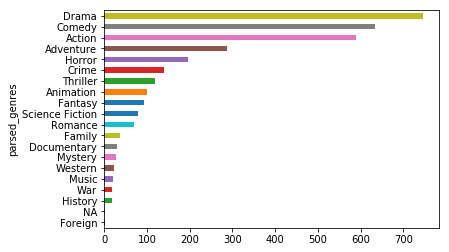

In [27]:
df_plot=movies_df.groupby('parsed_genres').budget.count().sort_values()
df_plot.plot(kind='barh')

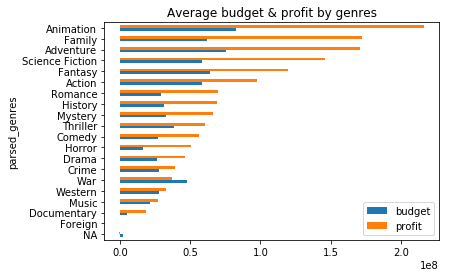

In [38]:
df_plot=movies_df.groupby('parsed_genres')[['budget','profit']].mean().sort_values(by='profit')
df_plot.plot(kind='barh',title='Average budget & profit by genres')

### Finding 3 : War and Adventure movies were more expensive than other genres that had same of higher profitability (e.g. Comedy and Family respectively)

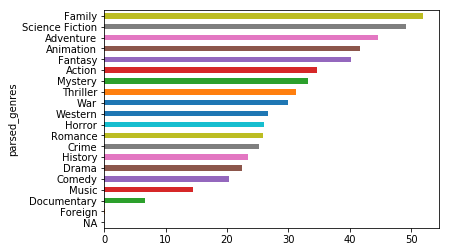

In [79]:
df_plot=movies_df.groupby('parsed_genres').popularity.mean().sort_values()
df_plot.plot(kind='barh')

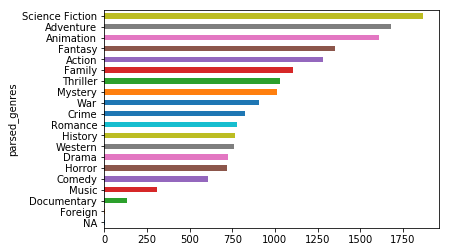

In [77]:
df_plot=movies_df.groupby('parsed_genres').vote_count.mean().sort_values()
df_plot.plot(kind='barh')

#### Analyze = Country of production : Top 10 by Profits

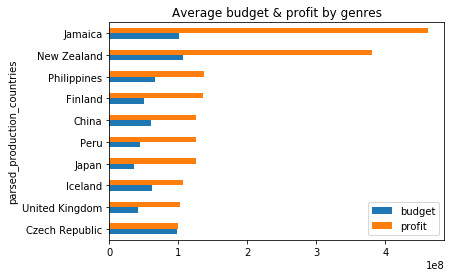

In [50]:
df_plot=movies_df.groupby('parsed_production_countries')[['budget','profit']].mean().sort_values(by='profit')
df_plot.iloc[-10:,:].plot(kind='barh',title='Average budget & profit by genres')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f06c940>,
      dtype=object)

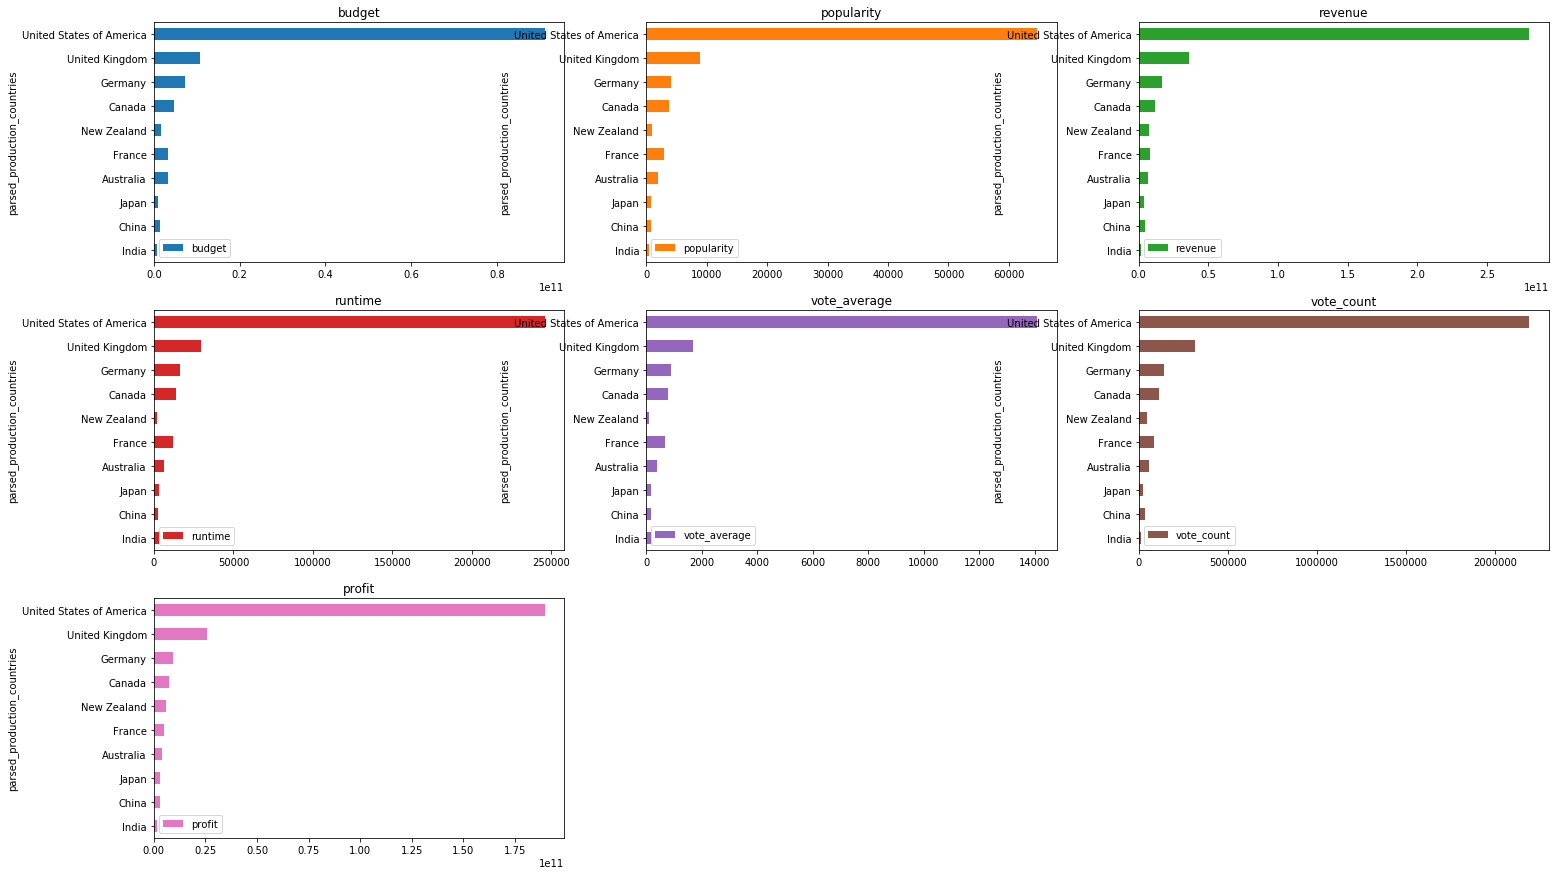

In [65]:
#Note call plot all numeric columns as well by a categorical variable. 
#However should keep those in separate subplots so that they each have relavant axis/scale
# That helps us view the variation clearly
df_plot=movies_df.drop(columns=['id','release_year']).groupby('parsed_production_countries').mean().sort_values(by='profit')
df_plot.iloc[-10:,:].plot(kind='barh',
                         subplots=True
                         ,layout=(3,3)
                         ,figsize=(25,15)
                         ,sharex=False)


### Finding 4 (from above graph): Jamaica make highly popular and profitable movies.
## However, if you see count of movies by countries you will see Jamaica has only 2 movies, It is not fair to make generalize for Jamaica based on just two movies.
#### Additional exercise: Remove countries that had countries lower than a certain threshold, before running the analysis, or plot the sum, instead of mean, to consider volume into account!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122a86eb8>,
      dtype=object)

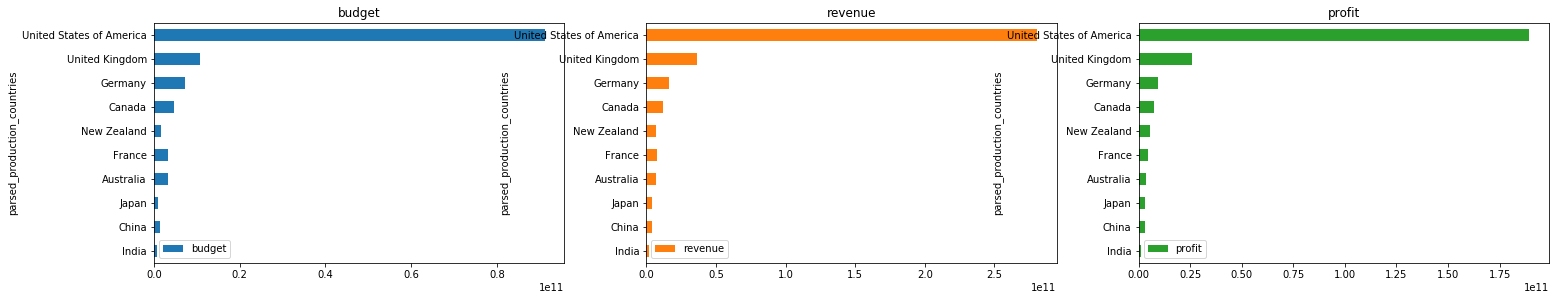

In [74]:
sum_cols=['budget','revenue','profit'] # note doesnt make sense to sum popularity indices, runtime etc.!
df_plot=movies_df.groupby('parsed_production_countries')[sum_cols].sum().sort_values(by='profit')
df_plot.iloc[-10:,:].plot(kind='barh',
                         subplots=True
                         ,layout=(3,3)
                         ,figsize=(25,15)
                         ,sharex=False)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122fda518>,
      dtype=object)

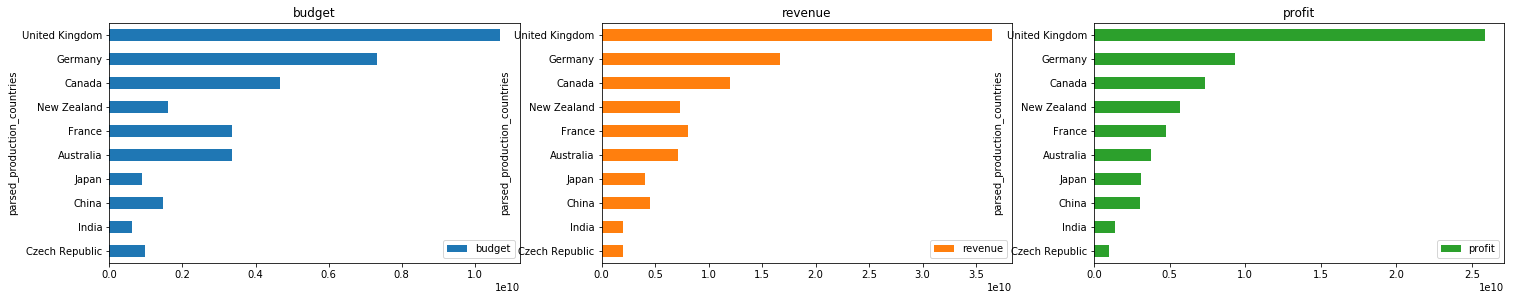

In [75]:
# US is clearly at top  (mainly driven by volume in this data!) Remove US to view the variation in next 10 clearly
df_plot.iloc[-11:-1,:].plot(kind='barh',
                         subplots=True
                         ,layout=(3,3)
                         ,figsize=(25,15)
                         ,sharex=False)


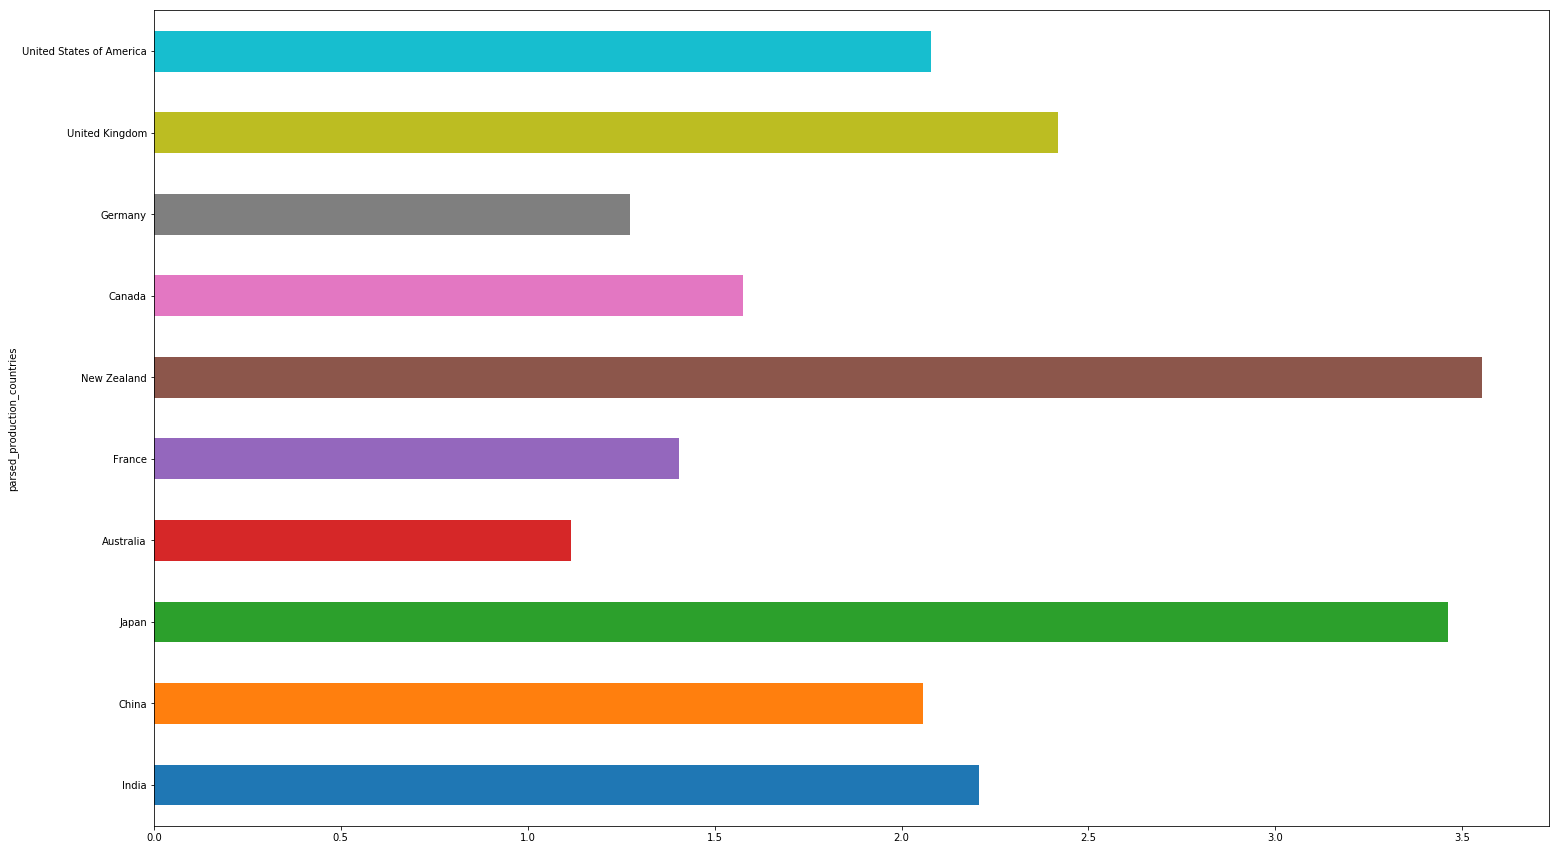

In [83]:
# By eyeballing we can see some countries have dispropotianetly higher profit than rest (like new zealand), 
# but a clearer insight can be made using RoI (return on investment)= profit/budget
df_plot['roi']=df_plot['profit']/df_plot['budget']
df_plot['roi'].iloc[-10:].plot(kind='barh'
                         ,figsize=(25,15)
                      )


### Finding 5: Among the top 10 countries by total profit, Newzealand & Japan have highest return on investment, while Austraila has least

## Time series plots

In [88]:
## `SET DATE COLUMN AS INDEX
movies_df=movies_df.set_index('release_date')

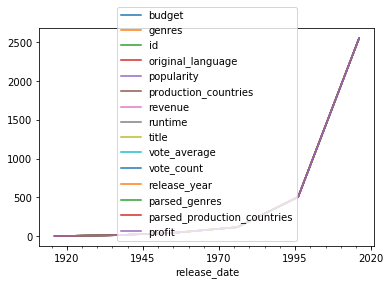

In [91]:
movies_df.resample('50A').count().plot()

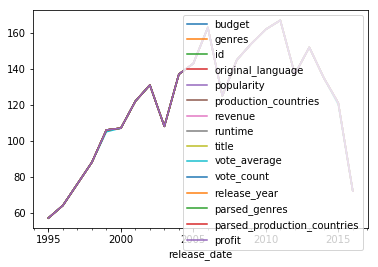

In [96]:
movies_df.loc['1995-01-01':].resample('A').count().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125aa0d30>,
      dtype=object)

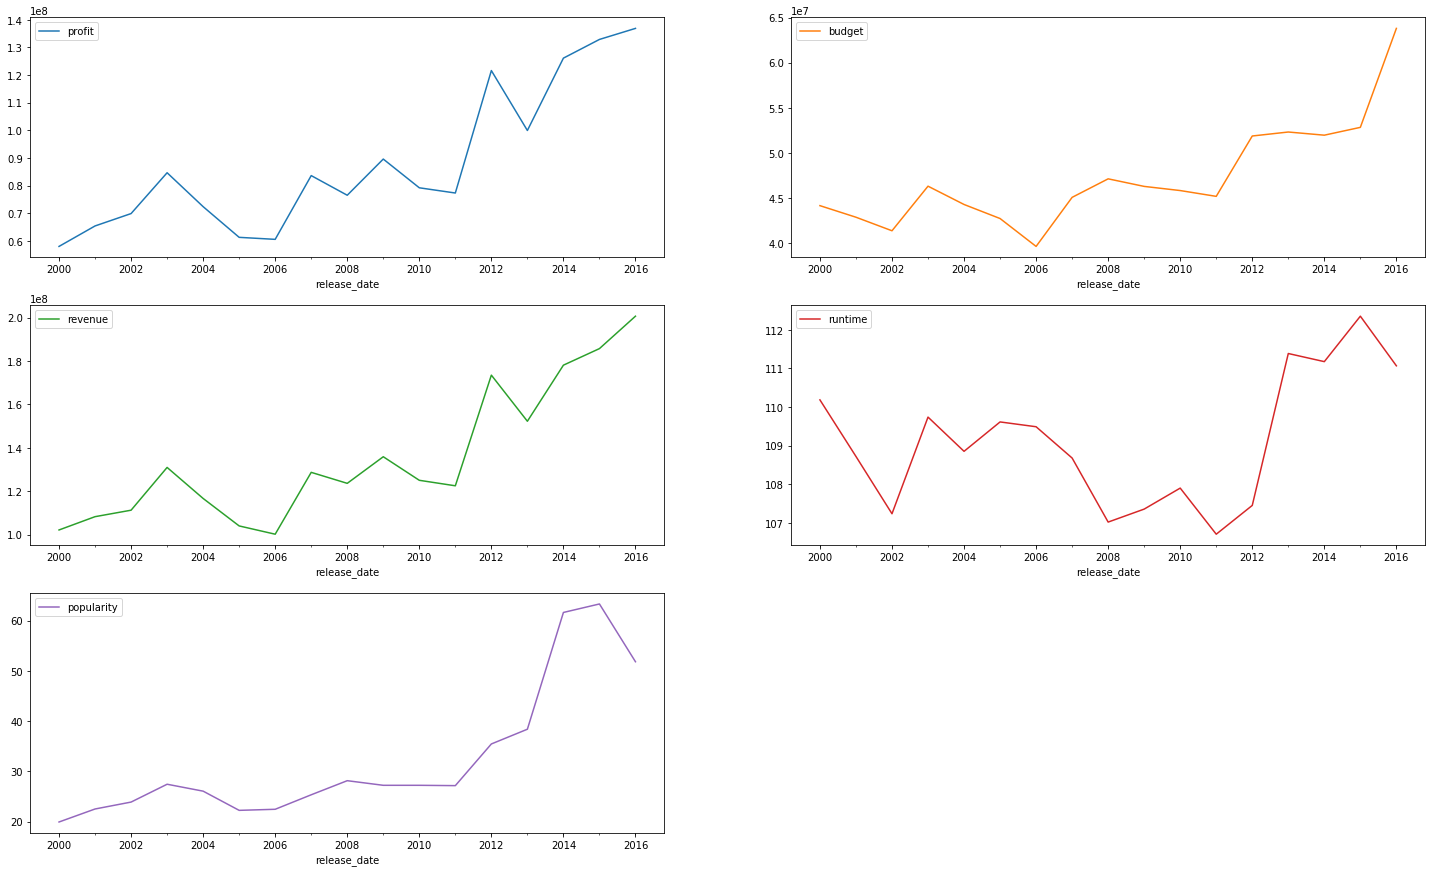

In [100]:
## above show that not many movies are present in data before 2000s. Let us filter data for after 2000
mean_cols=['profit','budget','revenue','runtime','popularity']
df_plot=movies_df.loc['2000-01-01':,mean_cols].resample('A').mean()
df_plot.plot(subplots=True, layout=(3,2), sharex=False,figsize=(25,15))

### Finding 6: Average budgets, revenue, profits all show upward trend 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127a5d8d0>,
      dtype=object)

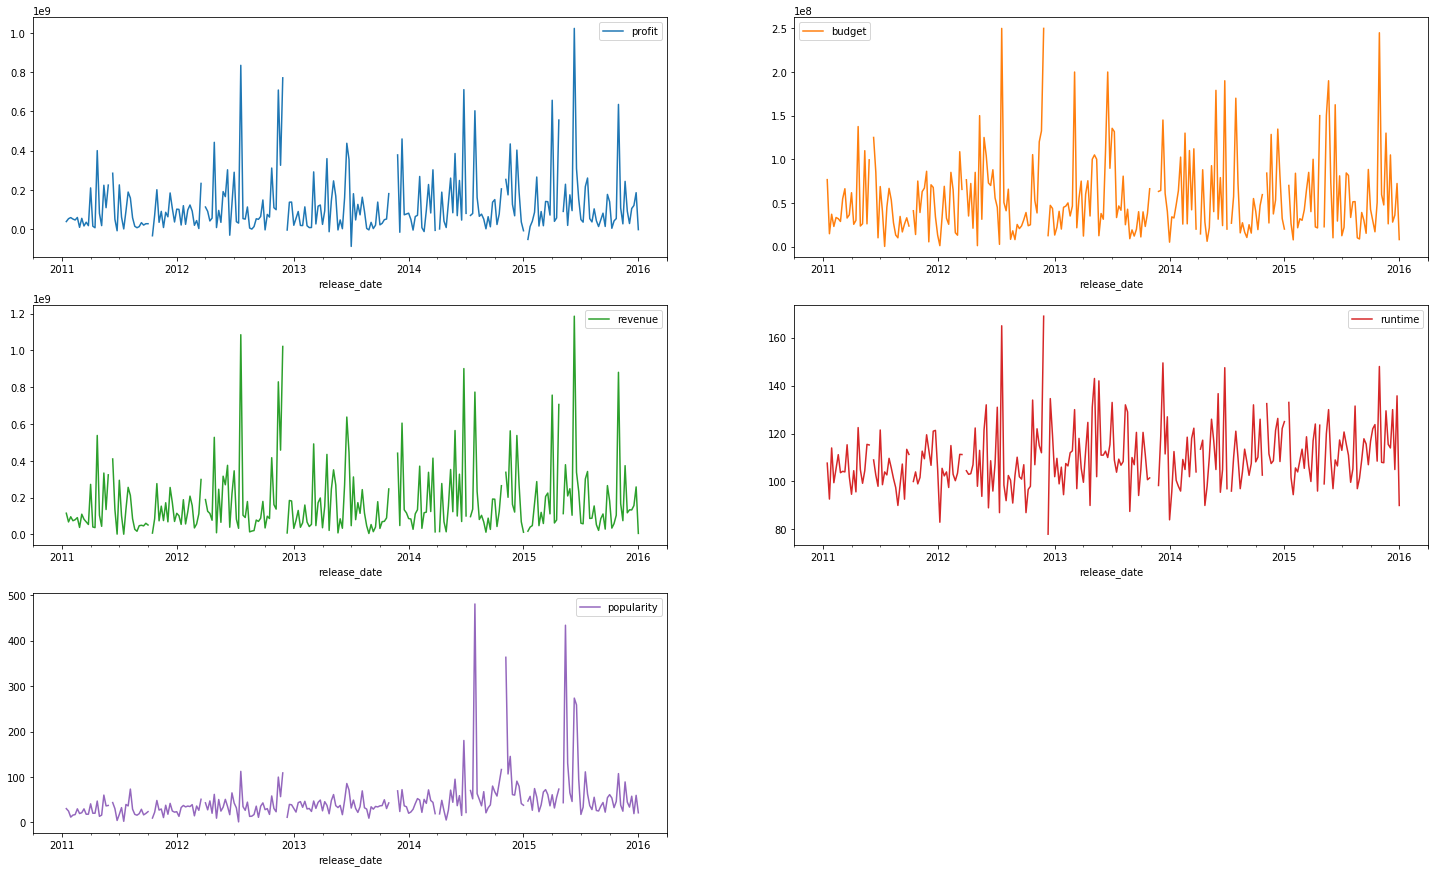

In [103]:
### Zoom in last 5 years and analyze by week
mean_cols=['profit','budget','revenue','runtime','popularity']
df_plot=movies_df.loc['2011-01-01':'2015-12-31',mean_cols].resample('W').mean()
df_plot.plot(subplots=True, layout=(3,2), sharex=False,figsize=(25,15))

In [ ]:
#Bonus: Analyze the counts by genres over time

In [114]:
group_df=(movies_df[movies_df['release_year']>=2000]
.groupby(['parsed_genres','release_year'],as_index=False)['budget'].count())

In [124]:
df_plot=group_df.pivot_table(index='release_year',columns='parsed_genres', values='budget',aggfunc='sum')
df_plot.head()

parsed_genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,NA,Romance,Science Fiction,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
2000,19.0,9.0,4.0,21.0,7.0,NaN,22.0,2.0,4.0,NaN,NaN,5.0,NaN,1.0,NaN,1.0,4.0,8.0,NaN,NaN
2001,29.0,12.0,2.0,28.0,6.0,2.0,25.0,NaN,2.0,NaN,1.0,4.0,1.0,3.0,NaN,NaN,1.0,5.0,1.0,NaN
2002,26.0,9.0,2.0,26.0,7.0,2.0,36.0,1.0,3.0,NaN,NaN,6.0,NaN,1.0,NaN,3.0,2.0,5.0,1.0,1.0
2003,20.0,11.0,2.0,24.0,4.0,1.0,24.0,3.0,3.0,NaN,NaN,6.0,1.0,2.0,1.0,1.0,NaN,4.0,NaN,1.0
2004,22.0,10.0,4.0,37.0,2.0,3.0,28.0,2.0,5.0,NaN,NaN,5.0,2.0,2.0,NaN,4.0,4.0,4.0,1.0,2.0


Text(0.5, 1.0, 'no. of movies of different genres release over years')

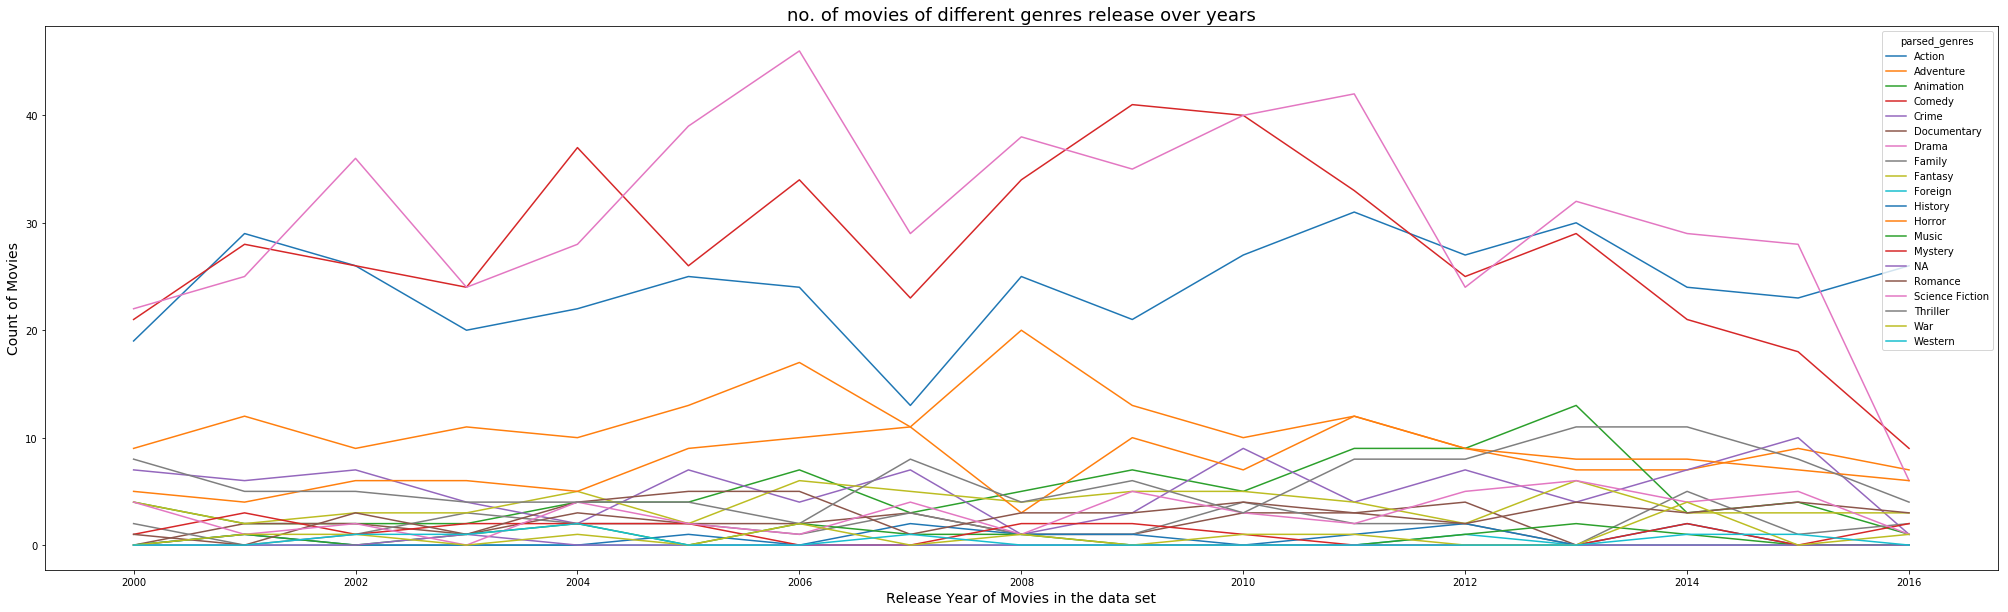

In [136]:
df_plot=group_df.pivot_table(index='release_year',columns='parsed_genres', values='budget',aggfunc='sum',fill_value=0)
df_plot.plot( figsize=(35,10)
           )

plt.xlabel('Release Year of Movies in the data set', fontsize = 14)
plt.ylabel('Count of Movies', fontsize = 14)
plt.title('no. of movies of different genres release over years', fontsize = 18)


## [Assignment](https://campus.elu.nl/courses/2/assignments/32?module_item_id=239)

## [Module 3 Project](https://campus.elu.nl/courses/2/assignments/33?module_item_id=241)